<a href="https://colab.research.google.com/github/LaizaCostaa/Case-An-lise-de-faturamento-Blog-x-Site/blob/main/Case_blogxsite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RESUMO**

Este projeto foi desenvolvido para auxiliar uma empresa de imóveis nas tomadas de decisões envolvendo o blog da marca.
O objetivo dessa análise é entender de que forma esse novo canal influencia na receita da empresa.

Para isso, por meio dessa análise, buscaremos:
- Detectar padrões e desvios nos dados;
- Identificar as variáveis mais relevantes e de que forma se relacionam entre si;
- Encontrar tendências e formular hipóteses;
- Realizar inferências estatísticas;
- Realizar teste de hipóteses;
- Fazer previsão da receita para o meses seguintes;




**CONTEXTO**

Status:

*   A empresa já possui um site de vendas que funciona há um tempo;
*   A empresa criou um blog com conteúdo há aproximadamente 3 meses;

Perguntas iniciais:

* Qual o impacto que o blog tem gerado na receita da empresa desde a sua criação?
* É viável para a empresa (em termos de receita) manter ou não o blog ativo??
* Qual a previsão da receita dos próximos meses, caso a empresa decida manter o blog?







In [135]:
import pandas as pd

import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("psel - data.csv")
df.head()

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
0,2019-01-01,349184,0,4693,0,46739
1,2019-01-02,867328,0,8501,0,83129
2,2019-01-03,758590,0,9375,0,86067
3,2019-01-04,688873,0,8405,0,69363
4,2019-01-05,441760,0,6136,0,56183


In [136]:
# Convertendo a coluna de data em um índice de data
df['data'] = pd.to_datetime(df['data'])
df['ano_mes'] = df['data'].apply(lambda s: datetime.date(s.year, s.month, 1))

df_group = df.groupby(['ano_mes'])['receita'].agg(['mean'])

In [137]:
# Convertendo a coluna de data em um índice de data
df['data'] = pd.to_datetime(df['data'])
df['ano_mes'] = df['data'].apply(lambda s: datetime.date(s.year, s.month, 1))

df_group = df.groupby(['ano_mes'])['receita'].agg(['mean'])

# Mudando a tipagem do index
df_group.index = pd.to_datetime(df_group.index)


In [138]:
def show_info(data):
  print('DATASET SHAPE: ', data.shape, '\n')
  print('-'*50)
  print('FEATURE DATA TYPES:')
  print(data.info())
  print('\n', '-'*50)
  print('NUMBER OF UNIQUE VALUES PER FEATURE: ', '\n')
  print(data.nunique())
  print('\n', '-'*50)
  print('NULL VALUES PER FEATURE')
  print(data.isnull().sum())

show_info(df)

DATASET SHAPE:  (639, 7) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             639 non-null    datetime64[ns]
 1   receita          639 non-null    int64         
 2   transacoes_blog  639 non-null    int64         
 3   transacoes_site  639 non-null    int64         
 4   usuarios_blog    639 non-null    int64         
 5   usuarios_site    639 non-null    int64         
 6   ano_mes          639 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 35.1+ KB
None

 --------------------------------------------------
NUMBER OF UNIQUE VALUES PER FEATURE:  

data               639
receita            639
transacoes_blog    122
transacoes_site    633
usuarios_blog      123
usuarios_site      636
ano_mes        

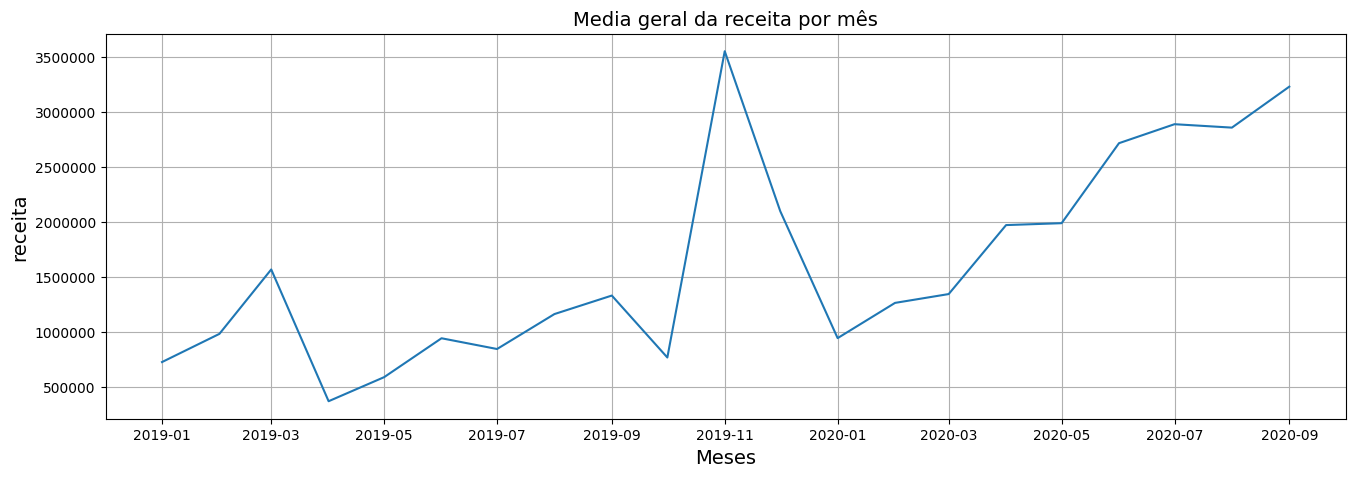

In [139]:
#média geral da receita por mês

df['data'] = pd.to_datetime(df['data'])
df['ano_mes'] = df['data'].apply(lambda s: datetime.date(s.year, s.month, 1))
df_group = df.groupby(['ano_mes'])['receita'].agg(['mean'])

plt.figure(figsize=(16,5))
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.title('Media geral da receita por mês', fontsize = 14)
plt.xlabel('Meses', fontsize = 14)
plt.ylabel('receita', fontsize = 14)
plt.plot(df_group)

# **TRATAMENTO DE OUTLIERS**

Identificando os outliers

In [140]:
from scipy import stats

#Definindo os percentis

p75, p50 = np.percentile(df['receita'], [75, 50])
print('Percentil 75: ',p75 )
print('Percentil 50: ',p50 )

Percentil 75:  2232769.5
Percentil 50:  1263161.0


In [141]:
#Encontrando os quartis 1 e 3

Q1, Q3 = np.percentile(df['receita'] , [25, 75])
print('Primeiro Quartil ou Percentil 25: ',Q1)
print('Terceito Quartil ou Percentil 75: ',Q3)


Primeiro Quartil ou Percentil 25:  807342.0
Terceito Quartil ou Percentil 75:  2232769.5


In [142]:
#Encontrando a amplitude interquartil

Amp_interquartil = Q3 - Q1
print(Amp_interquartil)

1425427.5


In [143]:
#Encontrando os limites dos outliers

limite_inferior = Q1 - (1.5 * Amp_interquartil)
limite_superior = Q3 + (1.5 * Amp_interquartil)

print('Limite Inferior: ', limite_inferior)
print('Limite Superior: ', limite_superior)

Limite Inferior:  -1330799.25
Limite Superior:  4370910.75


In [144]:
#Remoção dos outliers

df_sem_outlier = df.loc[(df['receita'] <= 4370910.75) & (df['receita'] >= 1330799.25)]




In [145]:
#Validando a remoção dos outliers

df_sem_outlier.describe()

,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
count,2.930000e+02,293.000000,293.000000,293.000000,293.000000
mean,2.379063e+06,1095.430034,25342.197952,2946.365188,119360.535836
std,7.270720e+05,1539.502926,10067.504558,4291.598732,32951.538736
min,1.331277e+06,0.000000,10159.000000,0.000000,59357.000000
25%,1.775681e+06,0.000000,18306.000000,0.000000,97003.000000
50%,2.251973e+06,0.000000,22565.000000,0.000000,112932.000000
75%,2.889479e+06,2222.000000,30311.000000,5908.000000,136374.000000
max,4.365090e+06,5586.000000,67296.000000,13059.000000,230227.000000


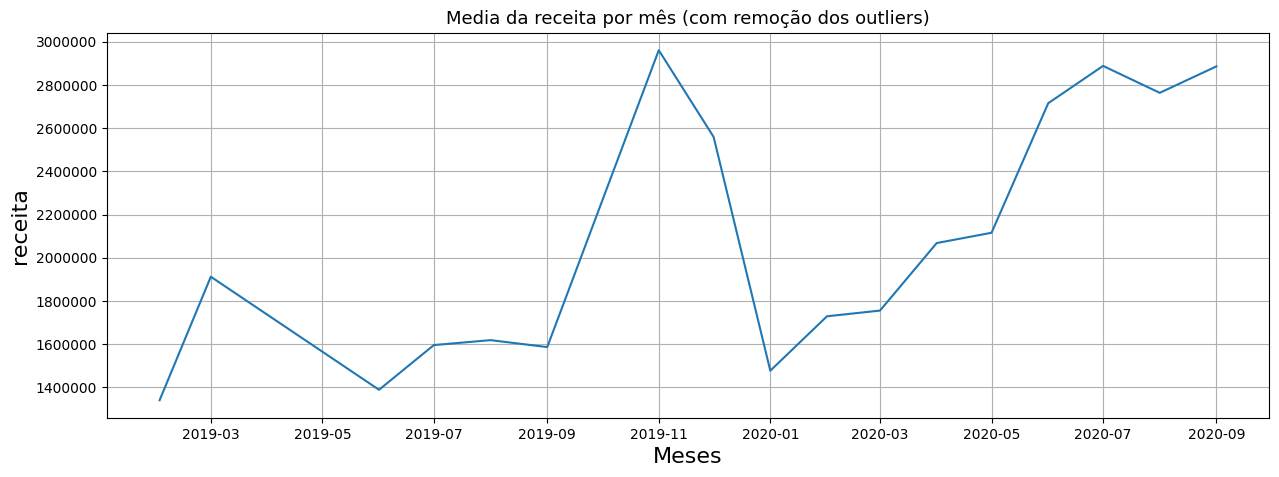

In [146]:
# visualização do data frame sem outlier

df_sem_outlier['ano_mes'] = df_sem_outlier['data'].apply(lambda s: datetime.date(s.year, s.month, 1))



df_sem_outlier_group = df_sem_outlier.groupby(['ano_mes'])['receita'].agg(['mean'])

plt.figure(figsize=(15,5))
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.title('Media da receita por mês (com remoção dos outliers)', fontsize = 13)
plt.xlabel('Meses', fontsize = 16)
plt.ylabel('receita', fontsize = 16)
plt.plot(df_sem_outlier_group)
plt.show()


**DIVISÃO DO DATA FRAME EM: PERÍODO ANTES DO BLOG X PERÍODO DEPOIS DO BLOG**




**1. Receita do período antes do blog**

In [147]:

launch_date = pd.Timestamp("2020-06-01")# Definir a data de lançamento do blog

df_antes_blog = df_sem_outlier[df_sem_outlier['data'] < launch_date]

df_depois_blog = df_sem_outlier[df_sem_outlier['data'] >= launch_date]


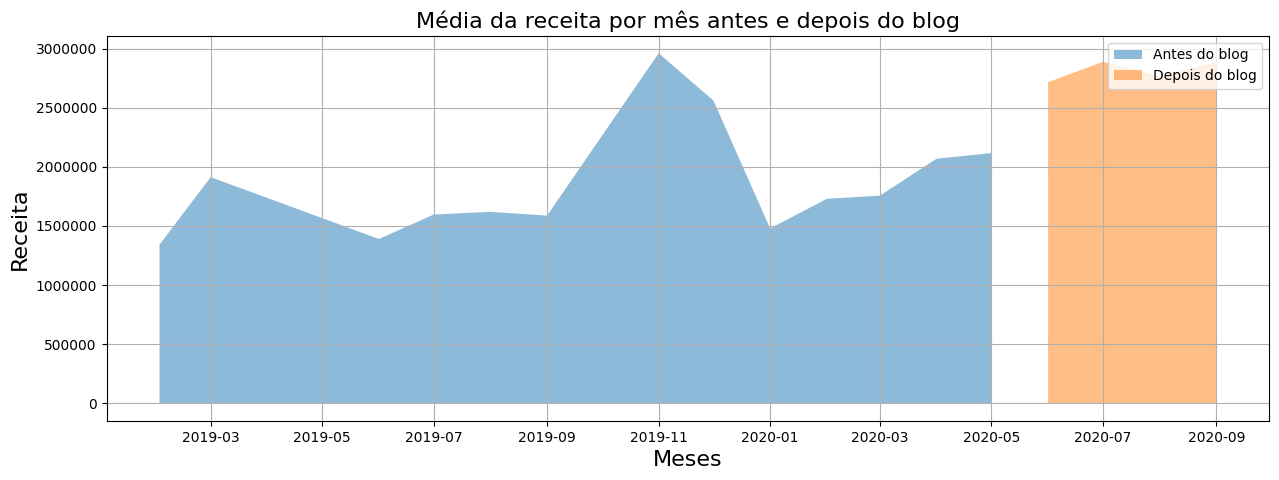

In [148]:

plt.figure(figsize=(15, 5))

# período antes do blog
plt.fill_between(df_antes_blog.groupby(['ano_mes'])['receita'].mean().index,
                 df_antes_blog.groupby(['ano_mes'])['receita'].mean().values,
                 alpha=0.5, label='Antes do blog')

# período depois do blog
plt.fill_between(df_depois_blog.groupby(['ano_mes'])['receita'].mean().index,
                 df_depois_blog.groupby(['ano_mes'])['receita'].mean().values,
                 alpha=0.5, label='Depois do blog')

plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.title('Média da receita por mês antes e depois do blog', fontsize=16)
plt.xlabel('Meses', fontsize=16)
plt.ylabel('Receita', fontsize=16)
plt.legend()

plt.show()

**Comportamento da receita do site antes do blog:**

*   No período de 05/19, o site estava apresentando uma queda;
*   Entre os messes 09 e 11, o site apresentou um pico de crescimento (blackfriday?)
*   Houve um aumento na receita após a chegada do blog


**Comparando as médias das receitas antes e depois do blog**

In [149]:
media_antes_blog = df_antes_blog['receita'].mean()

media_depois_blog = df_depois_blog['receita'].mean()

In [150]:
media_antes_blog

2091752.3238636365

In [151]:
media_depois_blog

2811256.1623931625

In [152]:
# Taxa de crescimento

percentual_crescimento = ((media_depois_blog - media_antes_blog) / media_antes_blog) * 100
print(f"Percentual de crescimento: {percentual_crescimento:.2f}%")


Percentual de crescimento: 34.40%


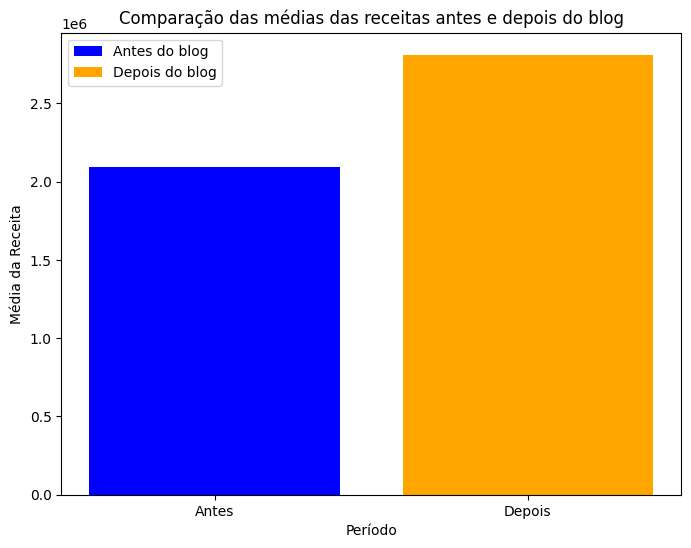

In [153]:

plt.figure(figsize=(8, 6))

plt.bar('Antes', media_antes_blog, color='blue', label='Antes do blog') # antes do blog

plt.bar('Depois', media_depois_blog, color='orange', label='Depois do blog') # depois do blog

plt.title('Comparação das médias das receitas antes e depois do blog')
plt.xlabel('Período')
plt.ylabel('Média da Receita')
plt.legend()

plt.show()

**Comportamento da receita:**



*   Houve um aumento de 34% após a chegada do blog (contando com as fontes blog e site);
*   Como a receita já vinha crescendo antes, quando só existia o site, não dá pra afirmar com tanta certeza, ainda, se esse crescimento foi decorrente do site ou do blog.





**TESTE DE HIPÓTESE**

In [154]:
# Teste de hipótese
alpha = 0.05  # nível de significância
stat, p = stats.ttest_ind(df_antes_blog['receita'], df_depois_blog['receita'], equal_var=False) #assumindo que não há igualdade de variâncias entre as amostras
if p < alpha:
    print("Rejeita H0: As médias das receitas são diferentes antes e depois do lançamento do blog.")
else:
    print("Aceita H0: Não há diferença significativa entre as médias das receitas antes e depois do lançamento do blog.")

Rejeita H0: As médias das receitas são diferentes antes e depois do lançamento do blog.


**ANÁLISE DE ESTACIONARIEDADE (TRIMESTRAL)**





In [155]:
# Média de receita trimestral antes do blog

df_antes_blog.index = pd.to_datetime(df_antes_blog['data'])
trimestral_antes_blog = df_antes_blog['receita'].resample('Q').mean()

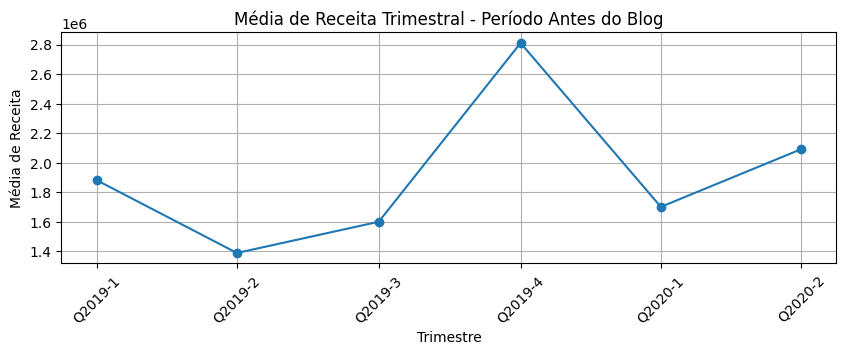

In [156]:

plt.figure(figsize=(10, 3))
plt.plot(trimestral_antes_blog, marker='o', linestyle='-')

plt.title('Média de Receita Trimestral - Período Antes do Blog')
plt.xlabel('Trimestre')
plt.ylabel('Média de Receita')

plt.xticks(trimestral_antes_blog.index, [f'Q{quarter.year}-{quarter.quarter}' for quarter in trimestral_antes_blog.index], rotation=45)

plt.grid(True)
plt.show()

In [157]:
# Média trimestral depois do blog

df_depois_blog.index = pd.to_datetime(df_depois_blog['data'])
trimestral_depois_blog = df_depois_blog['receita'].resample('3M').mean()

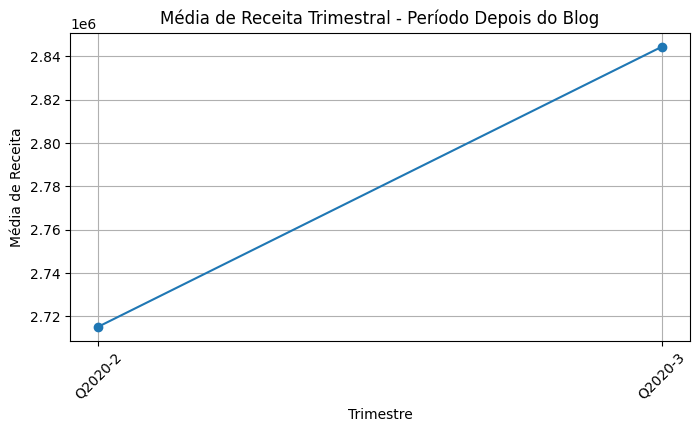

In [158]:

plt.figure(figsize=(8, 4))
plt.plot(trimestral_depois_blog, marker='o', linestyle='-')

plt.title('Média de Receita Trimestral - Período Depois do Blog')
plt.xlabel('Trimestre')
plt.ylabel('Média de Receita')

plt.xticks(trimestral_depois_blog.index, [f'Q{quarter.year}-{quarter.quarter}' for quarter in trimestral_depois_blog.index], rotation=45)

plt.grid(True)
plt.show()

In [159]:
trimestral_antes_blog.mean()

1912842.7890550105

In [160]:
trimestral_depois_blog.mean()

2779808.6413793107

In [161]:
valor_inicial = trimestral_antes_blog.mean()
valor_final = trimestral_depois_blog.mean()

percentual_aumento = ((valor_final - valor_inicial) / valor_inicial) * 100

print(f"Percentual de aumento: {percentual_aumento:.2f}%")

Percentual de aumento: 45.32%




*   Antes do blog, a receita era em média 1.912.842,78 por trimestre;
*   Depois do blog, a receita passou a ser em média 2.779.808,64 por trimestre




**ANÁLISE DE TENDÊNCIA (12 MESES)**

In [166]:
#média móvel de 12 meses  no período antes do blog

def plot_mediamovel(timeseries):
  rolmean = timeseries.rolling(12).mean()
  plt.figure(figsize=(15,6))
  orig = plt.plot(timeseries, color='black', label='Original')
  mean = plt.plot(rolmean, color= 'red', label='Média móvel receita geral')
  plt.legend(loc='best')
  plt.title('valor original e média móvel da receita geral')
  plt.show(block=False)

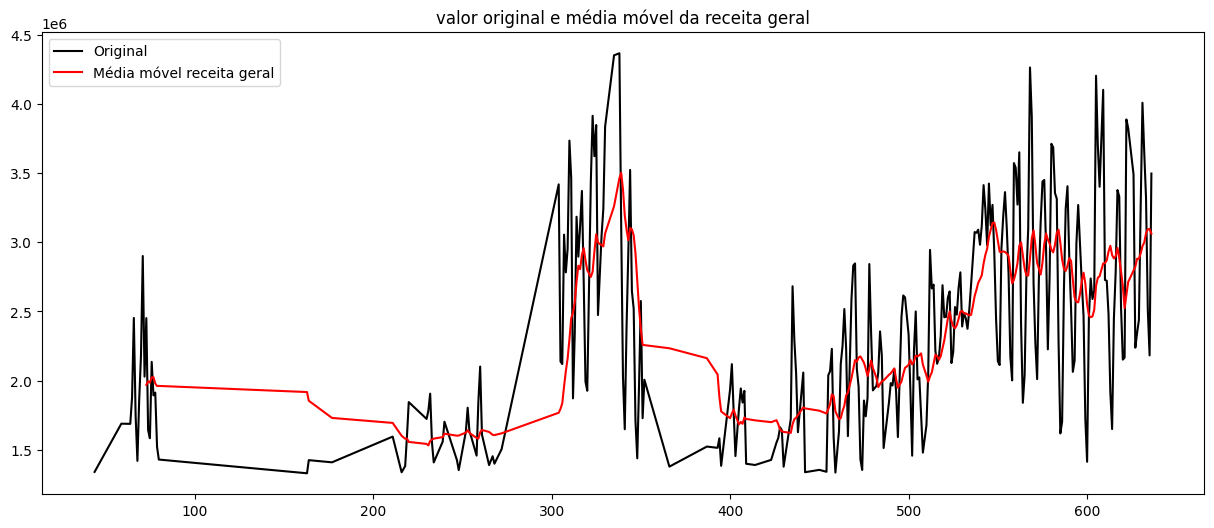

In [167]:
plot_mediamovel(df_sem_outlier['receita'])

**COMPARANDO O NÚMERO DE TRANSAÇÕES E O NÚMERO DE USUÁRIOS DO SITE E DO BLOG**


Text(0, 0.5, 'receita')

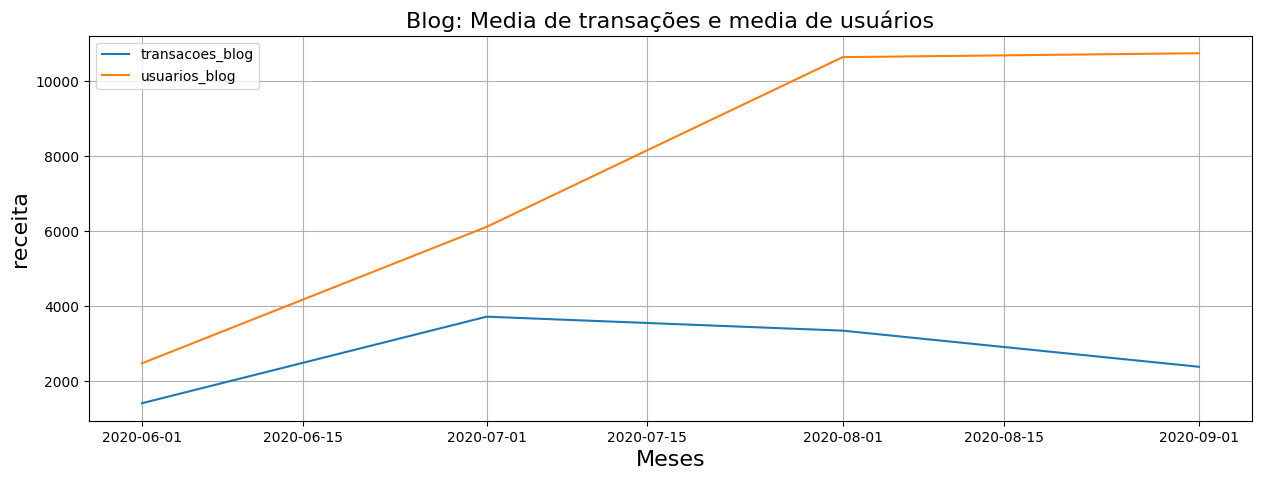

In [168]:
# Transacoes e usuários do blog no tempo
plt.figure(figsize=(15,5))
plt.plot( df_depois_blog.groupby(['ano_mes'])['transacoes_blog'].agg(['mean']), label='transacoes_blog')
plt.plot( df_depois_blog.groupby(['ano_mes'])['usuarios_blog'].agg(['mean']), label='usuarios_blog')

plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.legend()
plt.title('Blog: Media de transações e media de usuários', fontsize = 16)
plt.xlabel('Meses', fontsize = 16)
plt.ylabel('receita', fontsize = 16)


* O numero de usuarios do blog aumentou, mas a quantidade de transacoes foi menor
* Seria interessante comunicar a equipe responsavel pelo blog, para entender o que houve a partir do mes 07 de 2020 pra gerar essa quebra de correlacao entre transações e usuários

Text(0, 0.5, 'receita')

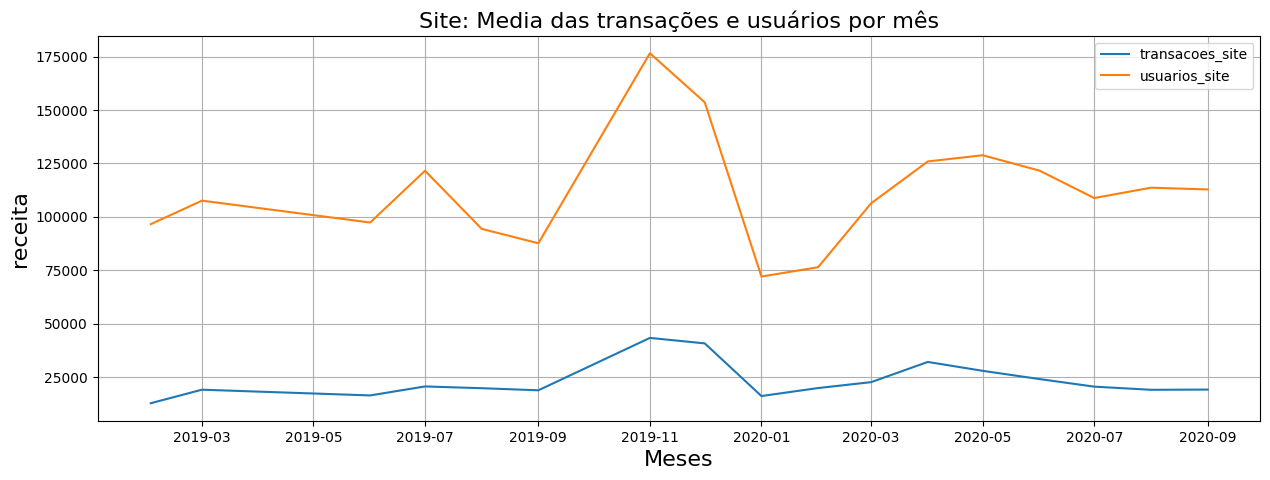

In [169]:
# Transacoes e usuários do site no tempo
plt.figure(figsize=(15,5))
plt.plot(df_sem_outlier.groupby(['ano_mes'])['transacoes_site'].agg(['mean']), label='transacoes_site')
plt.plot(df_sem_outlier.groupby(['ano_mes'])['usuarios_site'].agg(['mean']), label='usuarios_site')

plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.legend()
plt.title('Site: Media das transações e usuários por mês', fontsize = 16)
plt.xlabel('Meses', fontsize = 16)
plt.ylabel('receita', fontsize = 16)

**DESCOBRINDO O VALOR DE CADA TRANSAÇÃO**

*  Obter o valor de cada transação (blog e site) para comparar a receita de cada fonte com a receita geral

In [180]:
# Calcular a receita para cada transação do site antes do lançamento do blog
media_receita_site = df_antes_blog['receita'].mean()
media_transacoes_site = df_antes_blog['transacoes_site'].mean()
receita_por_transacao_site = media_receita_site / media_transacoes_site

df_sem_outlier['receita_site'] = df_sem_outlier.transacoes_site * receita_por_transacao_site
df_sem_outlier['receita_blog'] = df_sem_outlier.receita - df_sem_outlier.receita_site

# Calcular a receita para cada transação do blog
media_receita_blog = df_sem_outlier['receita_blog'].mean()
media_transacoes_blog = df_sem_outlier['transacoes_blog'].mean()
receita_por_transacao_blog = media_receita_blog / media_transacoes_blog

print(f'Valor por transacao do site: {receita_por_transacao_site}')
print(f'Valor por transacao do blog: {receita_por_transacao_blog}')
df_sem_outlier

Valor por transacao do site: 73.7271933859723
Valor por transacao do blog: 466.16724502385574


,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site,ano_mes,receita_site,receita_blog
44,2019-02-14,1340918,0,12798,0,96579,2019-02-01,9.435606e+05,3.973574e+05
59,2019-03-01,1689589,0,15577,0,97690,2019-03-01,1.148448e+06,5.411405e+05
64,2019-03-06,1688251,0,16212,0,105136,2019-03-01,1.195265e+06,4.929857e+05
65,2019-03-07,1877771,0,17793,0,108032,2019-03-01,1.311828e+06,5.659430e+05
66,2019-03-08,2453247,0,24376,0,109411,2019-03-01,1.797174e+06,6.560729e+05
...,...,...,...,...,...,...,...,...,...
632,2020-09-24,3648743,2379,22807,11700,130853,2020-09-01,1.681496e+06,1.967247e+06
633,2020-09-25,3320034,1996,21578,10082,112163,2020-09-01,1.590885e+06,1.729149e+06
634,2020-09-26,2509687,1580,15320,9292,96178,2020-09-01,1.129501e+06,1.380186e+06
635,2020-09-27,2182679,1838,14135,10052,103494,2020-09-01,1.042134e+06,1.140545e+06


1. **Comparando as receitas blog x site**

In [200]:
# Ajustando a coluna 'receita_blog'
def ajustar_receita_blog(transacoes_blog, receita_blog):
    if transacoes_blog == 0:
        return 0
    else:
        return receita_blog


df_sem_outlier['receita_blog'] = df_sem_outlier.apply(lambda x: ajustar_receita_blog(x['transacoes_blog'], x['receita_blog']) , axis=1)

df_sem_outlier

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site,ano_mes,receita_site,receita_blog
44,2019-02-14,1340918,0,12798,0,96579,2019-02-01,9.435606e+05,0.000000e+00
59,2019-03-01,1689589,0,15577,0,97690,2019-03-01,1.148448e+06,0.000000e+00
64,2019-03-06,1688251,0,16212,0,105136,2019-03-01,1.195265e+06,0.000000e+00
65,2019-03-07,1877771,0,17793,0,108032,2019-03-01,1.311828e+06,0.000000e+00
66,2019-03-08,2453247,0,24376,0,109411,2019-03-01,1.797174e+06,0.000000e+00
...,...,...,...,...,...,...,...,...,...
632,2020-09-24,3648743,2379,22807,11700,130853,2020-09-01,1.681496e+06,1.967247e+06
633,2020-09-25,3320034,1996,21578,10082,112163,2020-09-01,1.590885e+06,1.729149e+06
634,2020-09-26,2509687,1580,15320,9292,96178,2020-09-01,1.129501e+06,1.380186e+06
635,2020-09-27,2182679,1838,14135,10052,103494,2020-09-01,1.042134e+06,1.140545e+06


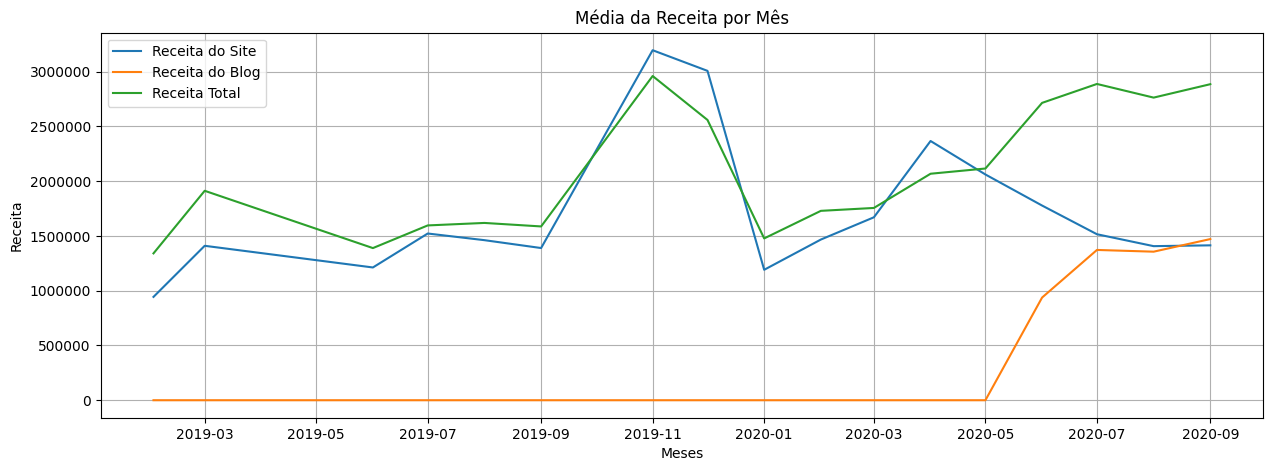

In [183]:

plt.figure(figsize=(15, 5))
plt.plot(df_sem_outlier.groupby(['ano_mes'])['receita_site'].mean(), label='Receita do Site')
plt.plot(df_sem_outlier.groupby(['ano_mes'])['receita_blog'].mean(), label='Receita do Blog')
plt.plot(df_sem_outlier.groupby(['ano_mes'])['receita'].mean(), label='Receita Total')

plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.legend()
plt.title('Média da Receita por Mês')
plt.xlabel('Meses')
plt.ylabel('Receita')

plt.show()

**Comportamento das receitas no tempo**
*  No período do blog, a receita do site teve uma queda, porém,
a receita total continuou aumentando.

*  A receita do blog acompanhou o crescimento da receita total durante o período de queda (entre junho e novembro). Ou seja, no período de queda do site, o blog foi a fonte que mais contribuiu com a receita total da empresa;

*  O site estava seguindo em crescimento, porém, justamente no período do lançamento do blog, houve uma queda;

* Perguntas:
    - Quais estavam sendo as ações estratégicas antes do blog, que estavam fazendo o site crescer?
    - Houve alguma mudança nessas estratégias após o período do blog?
    - Houve alguma mudança no fluxo de usuários do site? Eles passaram a acessar mais o blog e realizar transações por lá?
    - Os produtos vendidos no blog são mais caros? para indicar um aumento no valor de transação por usuário?

**TAXA DE CONVERSÃO BLOG X SITE**

In [100]:
df_sem_outlier['taxa_conversao_site'] = df_sem_outlier['transacoes_site'] / df_sem_outlier['usuarios_site']
df_sem_outlier['taxa_conversao_blog'] = df_sem_outlier['transacoes_blog'] / df_sem_outlier['usuarios_blog']

In [101]:

taxa_conversao_site_media = df_sem_outlier['taxa_conversao_site'].mean()
taxa_conversao_blog_media = df_sem_outlier['taxa_conversao_blog'].mean()
print("Taxa de conversão do site: {:.2%}".format(taxa_conversao_site_media))
print("Taxa de conversão do blog: {:.2%}".format(taxa_conversao_blog_media))

Taxa de conversão do site: 21.09%
Taxa de conversão do blog: 44.60%


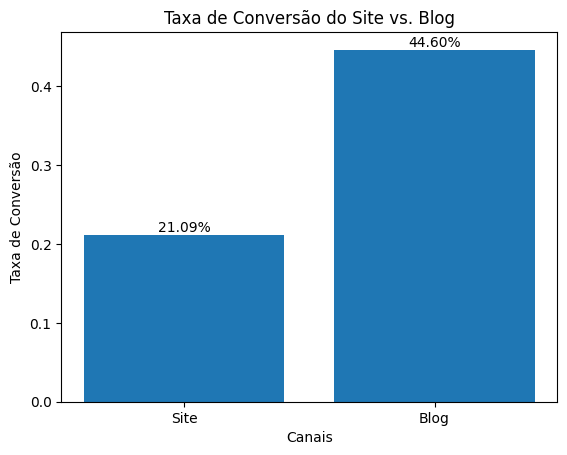

In [102]:
taxas = [taxa_conversao_site_media, taxa_conversao_blog_media]
labels = ['Site', 'Blog']

plt.bar(labels, taxas)
plt.xlabel('Canais')
plt.ylabel('Taxa de Conversão')
plt.title('Taxa de Conversão do Site vs. Blog')

for i, taxa in enumerate(taxas):
    plt.text(i, taxa, "{:.2%}".format(taxa), ha='center', va='bottom')

plt.show()

**CONCLUSÕES**

**TESTE DE HIPÓTESE:**
 As médias das receitas são diferentes antes e depois do lançamento do blog.


**RESPONDENDO ÀS PERGUNTAS DE NEGÓCIO**


1. Qual o impacto que o blog tem gerado na receita da empresa desde a sua criação?


*   Houve um aumento de 34% na receita após a chegada do blog (contando com as fontes blog e site);


*   Antes do blog, a receita era em média 1.912.842,78 por trimestre. Depois do blog, a receita passou a ser em média 2.779.808,64 por trimestre. Um aumento de 44% por trimestre.

*   A receita do blog acompanhou o crescimento da receita total durante o período de queda (entre junho e novembro). Ou seja, no período de queda do site, o blog foi a fonte que mais contribuiu com a receita total da empresa;


*	 Curiosidade: O site estava seguindo em crescimento, porém, justamente no período do lançamento do blog, houve uma queda;
    -	Quais estavam sendo as ações estratégicas antes do blog, que estavam fazendo o site crescer?
    -	Houve alguma mudança nessas estratégias após o período do blog?
    -	Houve alguma mudança no fluxo de usuários do site? Eles passaram a acessar mais o blog e realizar transações por lá?

2. É viável para a empresa (em termos de receita) manter ou não o blog ativo?

*  Os dados apontam que sim. Além do impacto significativo na receita, a taxa de conversão do blog também está alta.

    - conversão do site: 21,09%.
    - conversão do blog: 44,06%


3. É possível prever a receita dos próximos meses, caso a empresa decida manter o blog?

*  aplicação do modelo de prEvisão em parte II



